In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import datetime
import matplotlib.pyplot as plt
from scipy.ndimage import rank_filter
import lomb

In [ ]:
def read_var(varname, filename):
    with open(filename, 'r') as f:
        data = f.readlines()

    for (i,x) in enumerate(data):
        if ' ' + varname in x: start = i
                
    end = i
    for (i,x) in enumerate(data[start:]):
        if not x.strip(): lenblock = i; break
    var = pd.read_fwf(filename, header = None, squeeze = True, sep=' ',infer_nrows=lenblock, skiprows=start+1, nrows=lenblock)
    return var

In [ ]:
def to_xr(var):
    var.to_xarray()

In [ ]:
def filesanddates():    
    filename = "/Users/tobias/files.txt"
    with open(filename, 'r') as f:
        data = f.readlines()
    
    years = [int(d[0:4]) for d in data]
    months = [(d[5:7]) for d in data]
    monthss = ['DJ','JF','FM','MA','AM','MJ','JJ','JA','AS','SO','ON','ND']
    mon = [monthss.index(m) for m in months]
    test = [d[0:7] for d in data]
    date = [datetime.datetime(years[i], mon[i]+1, 1) for i in range(len(years))]
    
# filename = '/Users/tobias/Desktop/QBO Ancistrus/test10a.dat'
#    years = range(2002,2013)
#    year = [str(y) for y in range(2002,2013)]
#    months = ['DJ','JF','FM','MA','AM','MJ','JJ','JA','AS','SO','ON','ND']
#    month = [str(m) for m in months]
#    test = []
#    date = []
#    for y in year:
#        for m in month:
#            test.append( y + '_' + m )
#            date.append(datetime.datetime(years[year.index(y)], month.index(m)+1, 1))
#    
#    test = np.delete(test, [0,1,2,3,4,5,6,27,28,29,30,31,32,33,34,35,-8,-7,-6,-5,-4,-3,-2,-1])
#    date = np.delete(date, [0,1,2,3,4,5,6,27,28,29,30,31,32,33,34,35,-8,-7,-6,-5,-4,-3,-2,-1])
    return(test, date)

In [ ]:
def readvars(filename):
    varname = 'v_phi'
    var = read_var(varname, filename)

    varname = 'v_z'
    varz = read_var(varname, filename)

    varname = 'model altitude'
    alt = read_var(varname, filename)

    varname = 'model latitude'
    lat = read_var(varname, filename)

    latlist = lat.T.to_xarray().to_array().values.ravel()
    latlist = latlist[~np.isnan(latlist)]
    #print(latlist)
    altlist = alt.T.to_xarray().to_array().values.ravel()
    altlist = altlist[~np.isnan(altlist)]
    #print(altlist)
    varlist = var.T.to_xarray().to_array().values.ravel()
    varlist.resize(len(altlist),len(latlist))

    varzlist = varz.T.to_xarray().to_array().values.ravel()
    varzlist.resize(len(altlist),len(latlist))

    #print(np.shape(varlist),np.shape(var))
    
    varlist = varlist[np.newaxis,...]
    varzlist = varzlist[np.newaxis,...]
    return(varlist,varzlist,altlist,latlist)

In [ ]:
def readvars2(filename):
    varname = 'v_phi'
    var = read_var(varname, filename)

    varname = 'v_z'
    varz = read_var(varname, filename)

    varname = 'model altitude'
    alt = read_var(varname, filename)

    varname = 'model latitude'
    lat = read_var(varname, filename)

    latlist = lat.T.to_xarray().to_array().values.ravel()
    latlist = latlist[~np.isnan(latlist)]
    #print(latlist)
    altlist = alt.T.to_xarray().to_array().values.ravel()
    altlist = altlist[~np.isnan(altlist)]
    #print(altlist)
    varlist = var.T.to_xarray().to_array().values.ravel()
    varlist.resize(len(latlist),len(altlist))                  # <- changes here

    varzlist = varz.T.to_xarray().to_array().values.ravel()
    varzlist.resize(len(latlist),len(altlist))                 # <- changes here
    #print(np.shape(varlist),np.shape(var))
    
    varlist = varlist[np.newaxis,...]
    varzlist = varzlist[np.newaxis,...]
    return(varlist,varzlist,altlist,latlist)

In [ ]:
#df = pd.DataFrame({'year': [2014],
#...                    'month': [9],
#...                    'day': [6]})
#time = pd.to_datetime(df)

In [ ]:
def mkds(varlist,varzlist,latlist, altlist,time):# define data with variable attributes
    data_vars = {'v_phi':(['time', 'alt', 'lat'], varlist, 
                         {'units': 'm/s', 
                          'long_name':'meridional velocity'}),
                 'v_z'  :(['time', 'alt', 'lat'], varzlist, 
                         {'units': 'm/s', 
                          'long_name':'vertical velocity'})}##

# define coordinates
    coords = {'time': (['time'], [time]),
         'lat': (['lat'], latlist),
         'alt': (['alt'], altlist)}

# define global attributes
    attrs = {'creation_date':str(datetime.datetime.now()), 
         'author':'Tobias Kerzenmacher', 
         'email':'kerzenmacher@kit.edu'}

# create dataset
    ds = xr.Dataset(data_vars=data_vars, 
                coords=coords, 
                attrs=attrs)
    return(ds)

In [ ]:
def mkds3d(var, varname, varunit, varlongname, dim1, dimname1, dimunit1, dim2, dimname2, dimunit2, dim3, dimname3, dimunit3):# define data with variable attributes
    data_vars = {varname:([dim1, coordname2, coordname3], var, 
                         {'units': varunit, 
                          'long_name': varlongname})}##

# define coordinates
    coords = {dim1name: ([dim1name], dim1, {'units': dim1unit, 
                                            'long_name': dim1longname}),
              dim2name: ([dim2name], dim2,{'units': dim2unit, 
                                           'long_name': dim2longname}),
              dim3name: ([dim3name], dim3,{'units': dim3unit, 
                                           'long_name': dim3longname})}

# define global attributes
    attrs = {'creation_date':str(datetime.datetime.now()), 
         'author':'Tobias Kerzenmacher', 
         'email':'kerzenmacher@kit.edu'}

# create dataset
    ds = xr.Dataset(data_vars=data_vars, 
                coords=coords, 
                attrs=attrs)
    return(ds)

In [ ]:
def mkds2(varlist,varzlist,latlist, altlist,time):# define data with variable attributes
    data_vars = {'v_phi':(['time', 'lat', 'alt'], varlist,       # <- changes here
                         {'units': 'm/s', 
                          'long_name':'meridional velocity'}),
                 'v_z'  :(['time', 'lat', 'alt'], varzlist,      # <- changes here
                         {'units': 'm/s', 
                          'long_name':'vertical velocity'})}

# define coordinates
    coords = {'time': (['time'], [time]),
         'lat': (['lat'], latlist),
         'alt': (['alt'], altlist)}

# define global attributes
    attrs = {'creation_date':str(datetime.datetime.now()), 
         'author':'Tobias Kerzenmacher', 
         'email':'kerzenmacher@kit.edu'}

# create dataset
    ds = xr.Dataset(data_vars=data_vars, 
                coords=coords, 
                attrs=attrs)
    return(ds)

In [ ]:
test, date = filesanddates()
#test=test[0:2]
#date=date[0:2]
for i,t in enumerate(test):
    filename = '/Users/tobias/Mount/Ancistrus/test10a_'+t+'/output/test10a.dat'
    time = date[i]
    print(filename,time,i)
    varlist, varzlist, altlist, latlist = readvars(filename)
    #ds1 = mkds(varlist,varzlist,latlist, altlist,time)
    if i==0 : 
        print(varlist)
        ds = mkds(varlist,varzlist,latlist, altlist,time)
        print(ds)
    else:
        ds= xr.concat([ds,mkds(varlist,varzlist,latlist, altlist,time)],dim='time')
    #print(ds)


In [ ]:
test, date = filesanddates()
#test=test[0:2]
#date=date[0:2]
for i,t in enumerate(test):
    filename = '/Users/tobias/Mount/Ancistrus/test10a_'+t+'/output/test10a.dat'
    time = date[i]
    print(filename,time,i)
    varlist, varzlist, altlist, latlist = readvars2(filename)
    #ds1 = mkds2(varlist,varzlist,latlist, altlist,time)
    if i==0 : 
        #print(varlist)
        ds2 = mkds2(varlist,varzlist,latlist, altlist,time)
        #print(ds2)
    else:
        ds2= xr.concat([ds2,mkds2(varlist,varzlist,latlist, altlist,time)],dim='time')
    #print(ds2)


In [ ]:
ds.v_phi

In [ ]:
ds.to_netcdf('ancistrus_2_test10a.nc')

In [ ]:
xr.plot.contour(ds2.v_z[4])

In [ ]:
xr.plot.contour(ds.v_z[4])

In [ ]:
ds.v_z[:,:,15].T.plot()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ds2 = xr.open_dataset('ancistrus_test10a.nc')

In [2]:
ds = xr.open_dataset('ancistrus_2_test10a.nc')

In [ ]:
ds2.v_z[:,:,15].T.plot()

In [ ]:
clim2 = ds2.groupby("time.month").mean("time")
anom2 = ds2.groupby("time.month") - clim2

In [3]:
clim = ds.groupby("time.month").mean("time")
anom = ds.groupby("time.month") - clim

In [11]:
v_phi_trop30 = anom.v_phi.sel(alt=slice(25,35),lat=slice(-10,10)).mean('lat').mean('alt')


In [12]:
anom.v_z

<xarray.DataArray 'v_z' (time: 98, alt: 21, lat: 30)>
array([[[            nan, -2.62975000e-06, -1.83235778e-04, ...,
         -1.97083750e-05, -5.04495000e-05, -7.92553750e-05],
        [            nan,  3.17828889e-05, -3.38088889e-05, ...,
          4.99422222e-07, -1.68596667e-05, -7.97511111e-05],
        [ 4.61483333e-06,  5.91614444e-05, -4.59444444e-06, ...,
         -2.15099271e-05, -2.37842033e-05,  2.81197778e-06],
        ...,
        [ 5.48728778e-04,  4.56768667e-04,  4.22716178e-04, ...,
         -3.41213333e-04, -6.44401111e-04, -9.49007778e-04],
        [ 6.48112444e-04,  5.65334444e-04,  5.01040000e-04, ...,
         -3.87327444e-04, -5.97831111e-04, -8.26101222e-04],
        [ 8.29183556e-04,  7.44564111e-04,  6.70771111e-04, ...,
         -3.86584556e-04, -5.76925667e-04, -6.25663667e-04]],

       [[-3.32256000e-05, -1.63505714e-05, -2.85625000e-07, ...,
         -1.49123571e-04, -1.77788143e-04, -1.89401971e-04],
        [ 6.28652000e-05, -5.81512500e-06,  5.10925000e-06, ...,
          3.97150000e-05,  1.52500250e-05,  5.93501250e-05],
        [ 7.93541667e-05, -2.49671250e-05,  1.07648250e-05, ...,
          4.32805125e-05,  4.30955250e-05,  7.11235000e-06],
...
        [ 6.42222222e-05,  1.38200000e-04,  1.17388889e-04, ...,
          1.41501678e-03,  1.70719611e-03,  2.02304256e-03],
        [ 7.30888889e-05,  5.54266667e-05,  3.73333333e-06, ...,
          1.69500011e-03,  1.97334444e-03,  2.17560333e-03],
        [ 1.65273333e-04,  8.40111111e-05, -2.58411111e-05, ...,
          2.04352000e-03,  2.24131111e-03,  2.26060778e-03]],

       [[ 1.21096625e-04,  2.50483625e-04,  2.69350337e-04, ...,
          1.38871250e-04,  1.85845250e-04,  4.05219625e-04],
        [-1.15938100e-04,  8.89730000e-05,  2.08827375e-04, ...,
          1.08460200e-04,  1.19098388e-04,  2.96399500e-04],
        [-1.11196312e-04, -7.06650250e-05, -1.36688625e-05, ...,
          5.83780000e-05,  2.82011250e-05,  1.81230000e-04],
        ...,
        [ 2.38875000e-04,  2.38650000e-04,  7.40000000e-05, ...,
          8.81680000e-04,  1.14430375e-03,  1.35943538e-03],
        [ 2.00062500e-04,  3.01787500e-04,  1.96875000e-04, ...,
          7.57997500e-04,  1.02515250e-03,  1.20020375e-03],
        [ 1.78287500e-04,  3.40600000e-04,  3.00112500e-04, ...,
          7.31073750e-04,  9.42780000e-04,  9.86169125e-04]]])
Coordinates:
  * time     (time) datetime64[ns] 2002-08-01 2002-09-01 ... 2012-04-01
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0
  * alt      (alt) float64 6.0 9.0 12.0 15.0 18.0 ... 54.0 57.0 60.0 63.0 66.0
    month    (time) int64 8 9 10 11 12 1 2 3 4 5 6 ... 5 6 8 9 10 11 12 1 2 3 4

In [7]:
def find_local_maxima(x):
   x_dilate = rank_filter(x, -1, size=10)
   return x_dilate == x


In [8]:
def find_local_minima(x):
   x_erode = rank_filter(x, -0, size=3)
   return x_erode == x


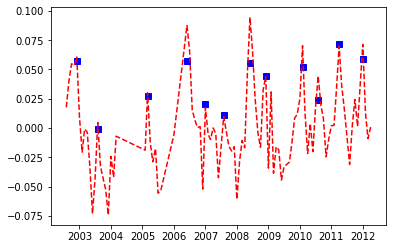

In [13]:
plt.plot(ds.time[find_local_maxima(v_phi_trop30)],v_phi_trop30[find_local_maxima(v_phi_trop30)],'bs',ds.time,anom.v_phi.sel(alt=30,lat=slice(-10,10)).mean('lat').T,'r--')

In [ ]:
import lomb

In [ ]:
fx,fy, nout, jmax, prob = lomb.fasper(ds.time.values,anom.v_phi.sel(alt=30,lat=slice(-10,10)).mean('lat').values, 6., 6.)

In [ ]:
anom.v_phi.sel(alt=30,lat=slice(-10,10)).mean('lat').values

In [ ]:
import numpy
import lomb
x = numpy.arange(10)
y = numpy.sin(x)
fx,fy, nout, jmax, prob = lomb.fasper(x,y, 6., 6.)

In [ ]:
import lomb

In [ ]:
del lomb

In [ ]:
lomb.fasper(x,y,6.,6.)

In [ ]:
print(nout,jmax,prob)

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import datetime
import matplotlib.pyplot as plt
from scipy.ndimage import rank_filter
import lomb

In [2]:
ds = xr.open_dataset('ancistrus_2_test10a.nc')
clim = ds.groupby("time.month").mean("time")
anom = ds.groupby("time.month") - clim

In [30]:
fx,fy, nout, jmax, prob = lomb.fasper(ds.time.values.astype(int)/60/60/24/1e9/30-ds.time.values[0].astype(int)/60/60/24/1e9/30,anom.v_phi.sel(alt=30,lat=slice(-10,10)).mean('lat').values, 12., 6.)

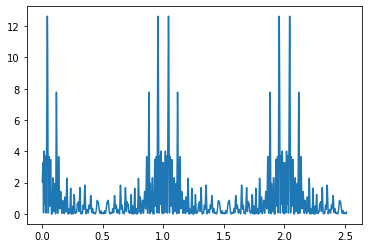

In [31]:
plt.plot(fx,fy)

In [16]:
ds.time.values.astype(int)/60/60/24/1e9/30-ds.time.values[0].astype(int)/60/60/24/1e9/30

array([  0.        ,   1.03333333,   2.03333333,   3.06666667,
         4.06666667,   5.1       ,   6.13333333,   7.06666667,
         8.1       ,   9.1       ,  10.13333333,  11.13333333,
        12.16666667,  13.2       ,  14.2       ,  15.23333333,
        16.23333333,  17.26666667,  18.3       ,  19.26666667,
        30.5       ,  31.43333333,  32.46666667,  33.46666667,
        34.5       ,  35.5       ,  36.53333333,  41.63333333,
        46.66666667,  47.66666667,  48.7       ,  49.73333333,
        50.73333333,  51.76666667,  52.76666667,  53.8       ,
        54.83333333,  55.76666667,  56.8       ,  57.8       ,
        58.83333333,  59.83333333,  60.86666667,  61.9       ,
        62.9       ,  63.93333333,  64.93333333,  65.96666667,
        67.        ,  67.96666667,  69.        ,  70.        ,
        71.03333333,  72.03333333,  73.06666667,  74.1       ,
        75.1       ,  76.13333333,  77.13333333,  78.16666667,
        79.2       ,  80.13333333,  81.16666667,  82.16

In [15]:
anom.lat

<xarray.DataArray 'lat' (lat: 30)>
array([-87., -81., -75., -69., -63., -57., -51., -45., -39., -33., -27., -21.,
       -15.,  -9.,  -3.,   3.,   9.,  15.,  21.,  27.,  33.,  39.,  45.,  51.,
        57.,  63.,  69.,  75.,  81.,  87.])
Coordinates:
  * lat      (lat) float64 -87.0 -81.0 -75.0 -69.0 -63.0 ... 69.0 75.0 81.0 87.0